Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnost

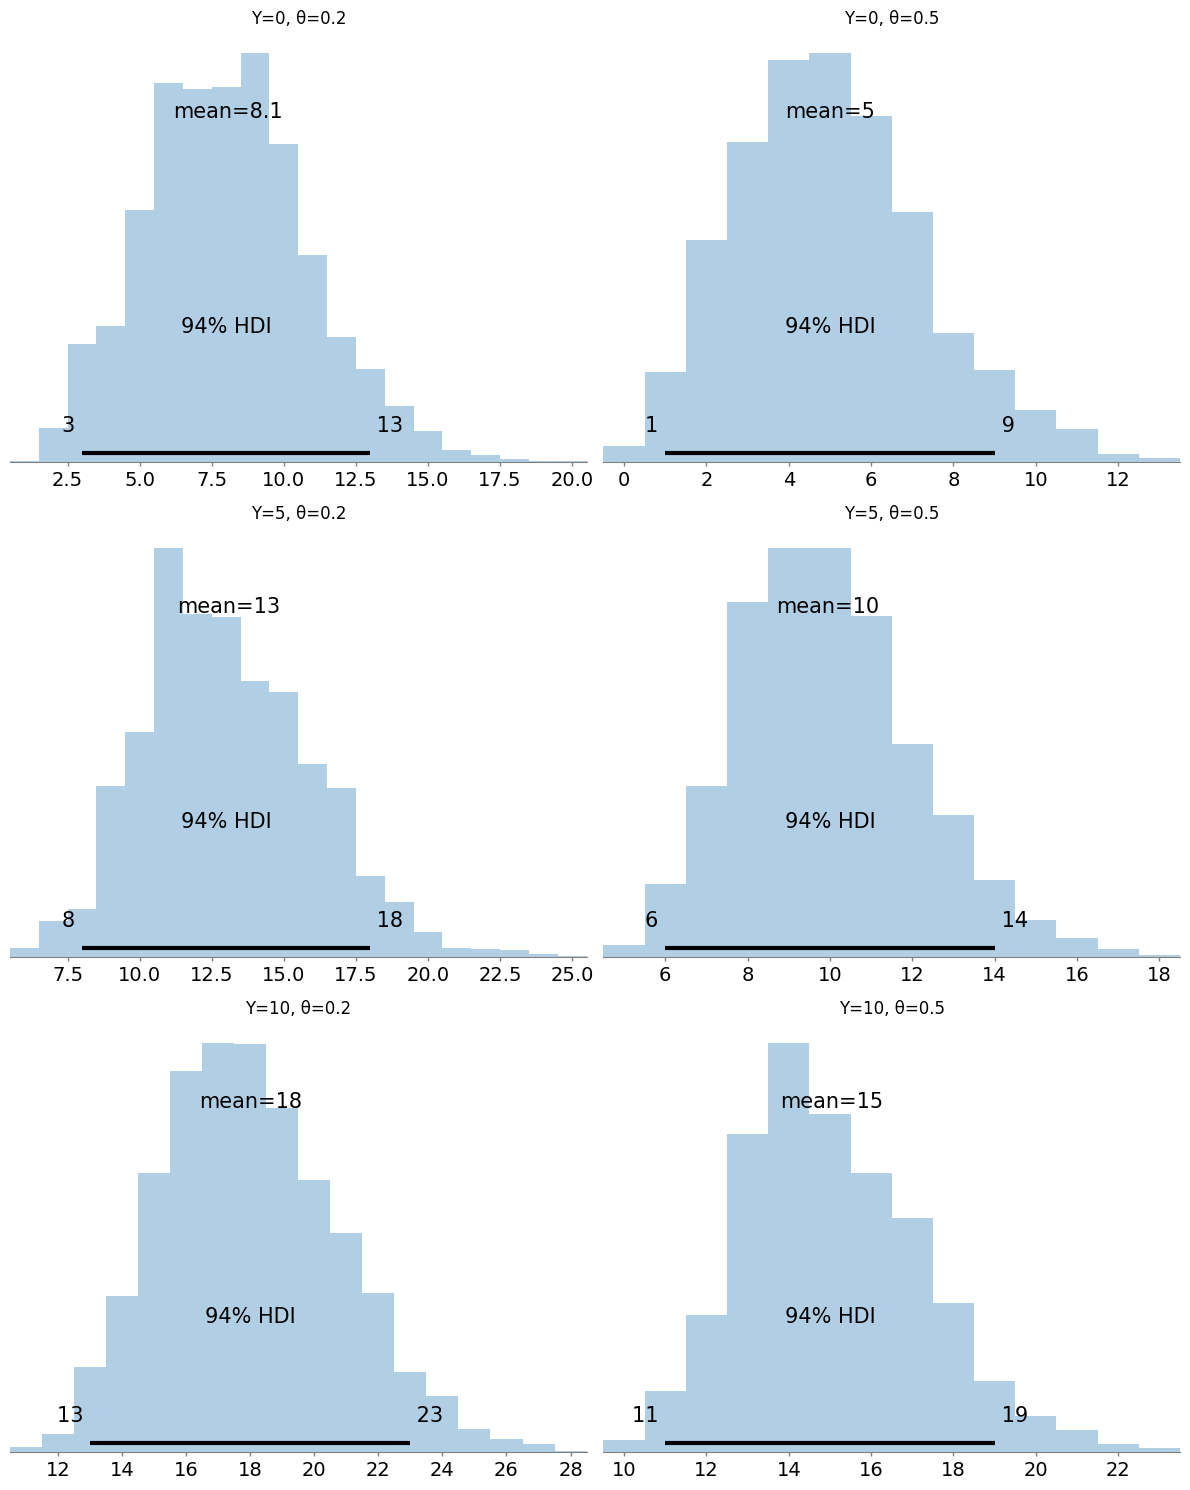

In [2]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

combinations = [(0, 0.2), (0, 0.5), (5, 0.2), (5, 0.5), (10, 0.2), (10, 0.5)]

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for i, (Y, theta) in enumerate(combinations):
    with pm.Model() as model:
        n = pm.Poisson("n", mu=10)
        Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)
        
        trace = pm.sample(2000, return_inferencedata=True, chains=2, progressbar=False)
        
        az.plot_posterior(trace, var_names=["n"], ax=axes[i])
        axes[i].set_title(f"Y={Y}, θ={theta}")

plt.tight_layout()
plt.show()


# Y - mic => valori mai mici pt n => daca nimeni nu cumpara, este putin probabil sa fi existat multi clienti in total
# Y - mare => valori mare pt n => un numar mare de cumparatori sugereaza ca exista un nr mare de clienti total

# theta - mic => posteriorul pt n se intinde pe un interval mai mare, deci valori mai mari pt n 
#   => o sansa mica de cumparare, este nevoie de un numar mare de clienti pt a explica Y
# theta - mare => posteriorul se concentreaza pe valori mai mici pt n =>
#   => o sansa mare de cumparare, este nevoie de un numar mai mic de clienti pt a explicat Y